# Nonlinear Regression Analysis

**Date:** 22 September 2025

**Topic:** Advanced regression techniques for non-linear relationships

This notebook covers three main types of non-linear regression:
1. Polynomial Regression
2. Exponential Regression
3. Power Function Models

## 1. Setup and Dependencies

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

## 2. Polynomial Regression

### 2.1 Dataset Creation
We'll use synthetic data showing the relationship between study hours and exam scores.

In [2]:
# Create sample dataset for polynomial regression
data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [50, 65, 75, 80, 85, 88, 89, 88, 85, 80]
}

# Convert to DataFrame
df = pd.DataFrame(data)
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (10, 2)

First few rows:


,Study_Hours,Exam_Score
0,1,50
1,2,65
2,3,75
3,4,80
4,5,85


### 2.2 Data Visualization

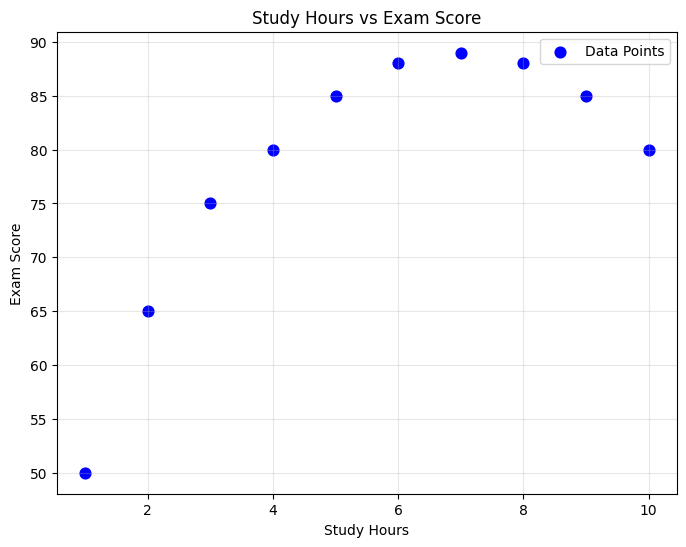

In [3]:
# Prepare features and target variables
X = df[['Study_Hours']]
y = df[['Exam_Score']]

# Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points', color='blue', s=60)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs Exam Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 2.3 Model Fitting and Comparison

In [4]:
# Fit linear regression for comparison baseline
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_pred = lin_reg.predict(X)

# Fit polynomial regression (quadratic)
poly_degree = 2
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
poly_pred = poly_reg.predict(X_poly)

### 2.4 Results Visualization and Evaluation

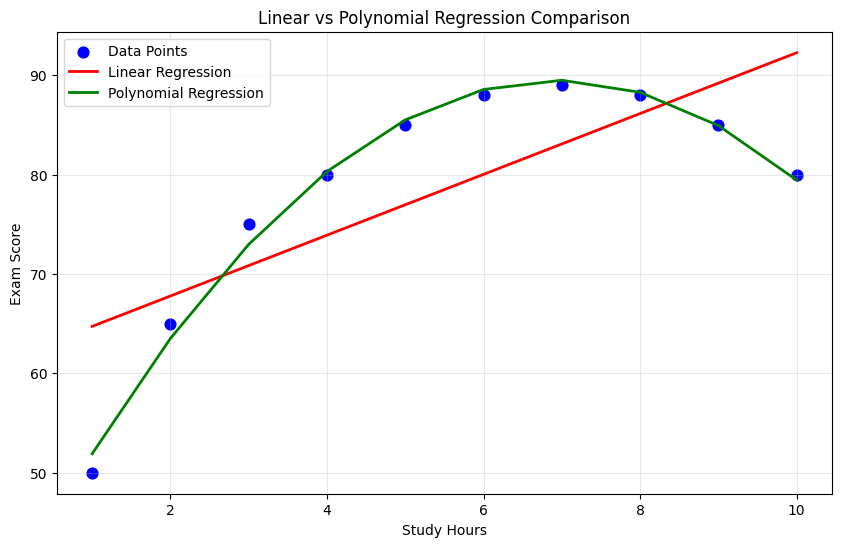

Linear Regression MSE: 61.37
Polynomial Regression MSE: 1.12
Improvement: 98.2%


In [5]:
# Plot comparison between linear and polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data Points', color='blue', s=60)
plt.plot(X, lin_pred, label='Linear Regression', color='red', linewidth=2)
plt.plot(X, poly_pred, label='Polynomial Regression', color='green', linewidth=2)
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Linear vs Polynomial Regression Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Evaluate model performance
lin_mse = mean_squared_error(y, lin_pred)
poly_mse = mean_squared_error(y, poly_pred)

print(f'Linear Regression MSE: {lin_mse:.2f}')
print(f'Polynomial Regression MSE: {poly_mse:.2f}')
print(f'Improvement: {((lin_mse - poly_mse) / lin_mse * 100):.1f}%')

## 3. Exponential Regression

### 3.1 Dataset Creation
Using user engagement data that shows exponential growth pattern.

In [6]:
# Create exponential growth dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100, 150, 225, 338, 507, 761, 1142, 1713, 2570, 3855]
}

# Convert to DataFrame and prepare time features
df_exp = pd.DataFrame(data)
df_exp['Days'] = (df_exp['Date'] - df_exp['Date'].min()).dt.days

print("Exponential dataset:")
print(df_exp.head())

Exponential dataset:
        Date  Engaged_Users  Days
0 2022-01-01            100     0
1 2022-01-02            150     1
2 2022-01-03            225     2
3 2022-01-04            338     3
4 2022-01-05            507     4


### 3.2 Model Fitting using Log Transformation

In [7]:
# Prepare data for exponential regression
X_exp = df_exp[['Days']].values
y_exp = df_exp['Engaged_Users'].values

# Exponential regression using log transformation
# Model: y = a * exp(b * x)
# Log transform: log(y) = log(a) + b * x
log_y = np.log(y_exp)
exp_reg = LinearRegression()
exp_reg.fit(X_exp, log_y)

# Extract exponential parameters
a = np.exp(exp_reg.intercept_)  # Base value
b = exp_reg.coef_[0]            # Growth rate

print(f'Exponential model parameters:')
print(f'a (base): {a:.2f}')
print(f'b (growth rate): {b:.4f}')
print(f'Model: y = {a:.2f} * exp({b:.4f} * x)')

Exponential model parameters:
a (base): 99.99
b (growth rate): 0.4058
Model: y = 99.99 * exp(0.4058 * x)


### 3.3 Linear vs Exponential Comparison

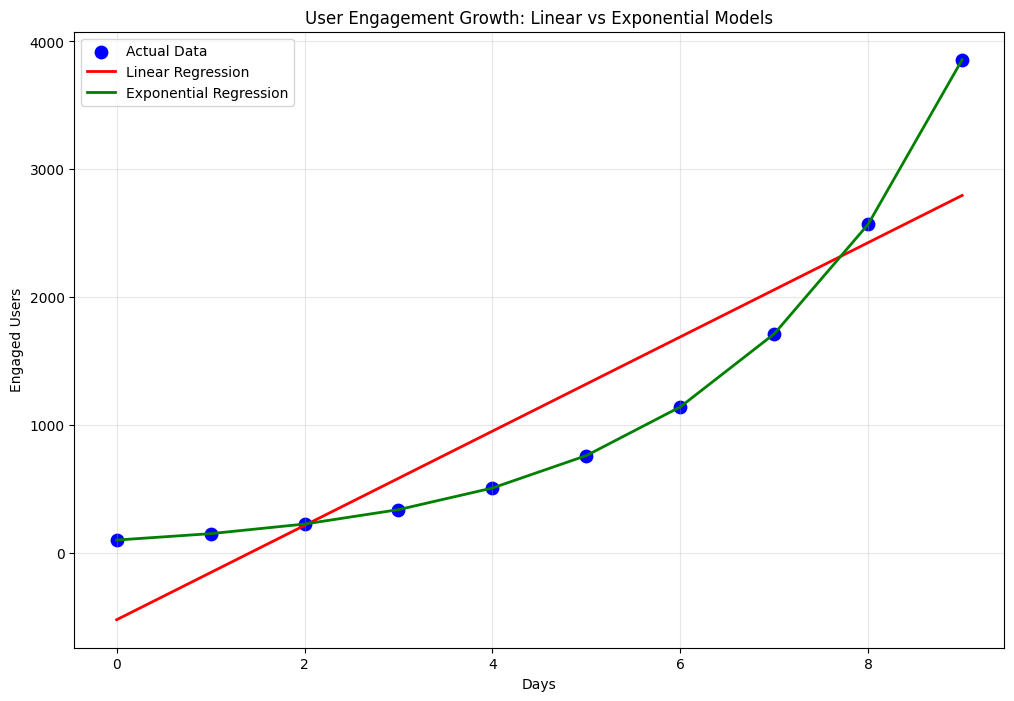

Linear Regression MSE: 261371
Exponential Regression MSE: 0
Improvement: 100.0%


In [8]:
# Generate predictions
y_exp_pred = a * np.exp(b * X_exp.flatten())

# Fit linear regression for comparison
lin_reg_exp = LinearRegression()
lin_reg_exp.fit(X_exp, y_exp)
y_lin_pred = lin_reg_exp.predict(X_exp)

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(df_exp['Days'], y_exp, label='Actual Data', color='blue', s=80)
plt.plot(df_exp['Days'], y_lin_pred, label='Linear Regression', color='red', linewidth=2)
plt.plot(df_exp['Days'], y_exp_pred, label='Exponential Regression', color='green', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Engaged Users')
plt.title('User Engagement Growth: Linear vs Exponential Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate performance metrics
lin_mse_exp = mean_squared_error(y_exp, y_lin_pred)
exp_mse = mean_squared_error(y_exp, y_exp_pred)

print(f'Linear Regression MSE: {lin_mse_exp:.0f}')
print(f'Exponential Regression MSE: {exp_mse:.0f}')
print(f'Improvement: {((lin_mse_exp - exp_mse) / lin_mse_exp * 100):.1f}%')

## 4. Power Function Models

### 4.1 Social Media Dataset
Analyzing the relationship between followers and engagement metrics.

In [9]:
# Create social media engagement dataset
data_power = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25, 50, 100, 200, 350, 550, 800, 1100, 1450, 1850],
    'Shares': [5, 10, 20, 40, 70, 110, 160, 220, 290, 370],
    'Comments': [2, 4, 8, 16, 28, 44, 64, 88, 116, 148]
}

df_power = pd.DataFrame(data_power)
print("Power model dataset:")
print(df_power.head())

Power model dataset:
   User_ID  Followers  Likes  Shares  Comments
0        1         10     25       5         2
1        2         20     50      10         4
2        3         30    100      20         8
3        4         40    200      40        16
4        5         50    350      70        28


### 4.2 Power Function Fitting
Using scipy.optimize.curve_fit to estimate power law relationship.

In [10]:
# Define power function: y = a * x^b
def power_function(x, a, b):
    return a * np.power(x, b)

# Fit power model for Followers vs Likes relationship
likes_params, likes_cov = curve_fit(power_function, df_power['Followers'], df_power['Likes'])

# Extract parameters
a_power, b_power = likes_params
print(f'Power model parameters for Followers vs Likes:')
print(f'a (scaling factor): {a_power:.4f}')
print(f'b (power exponent): {b_power:.4f}')
print(f'Model: Likes = {a_power:.4f} * Followers^{b_power:.4f}')

Power model parameters for Followers vs Likes:
a (scaling factor): 0.0326
b (power exponent): 2.3781
Model: Likes = 0.0326 * Followers^2.3781


### 4.3 Power Model Visualization

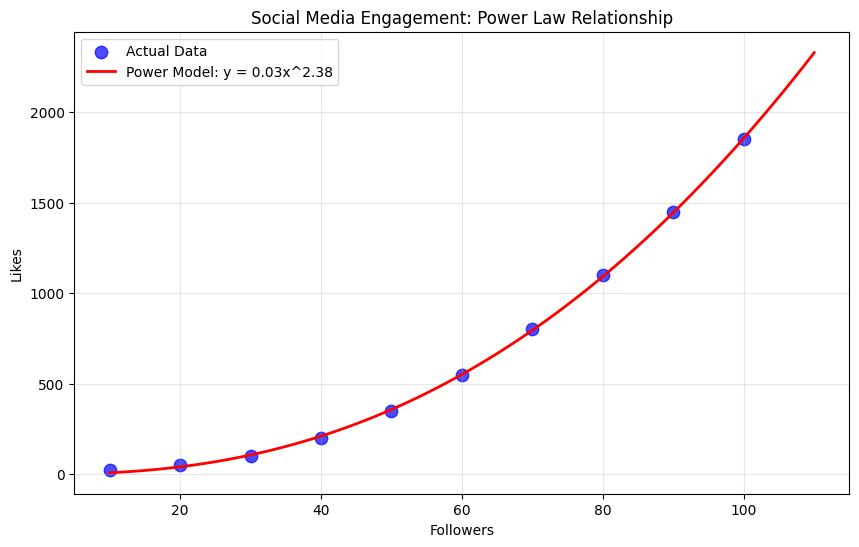

Power model R-squared: 0.9998
Model explains 100.0% of the variance in the data


In [11]:
# Generate smooth curve for visualization
followers_range = np.linspace(10, 110, 100)
predicted_likes = power_function(followers_range, *likes_params)

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(df_power['Followers'], df_power['Likes'], 
           label='Actual Data', color='blue', s=80, alpha=0.7)
plt.plot(followers_range, predicted_likes, 
         label=f'Power Model: y = {a_power:.2f}x^{b_power:.2f}', 
         color='red', linewidth=2)
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.title('Social Media Engagement: Power Law Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calculate R-squared for model fit quality
y_pred_power = power_function(df_power['Followers'], *likes_params)
ss_res = np.sum((df_power['Likes'] - y_pred_power) ** 2)
ss_tot = np.sum((df_power['Likes'] - np.mean(df_power['Likes'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f'Power model R-squared: {r_squared:.4f}')
print(f'Model explains {r_squared*100:.1f}% of the variance in the data')

## 5. Summary

### Key Takeaways

1. **Polynomial Regression**: Effective for capturing curved relationships with local maxima/minima
2. **Exponential Regression**: Ideal for growth/decay processes using log transformation
3. **Power Models**: Suitable for scaling relationships common in natural and social phenomena

### Model Selection Guidelines
- Use polynomial for bounded, curved relationships
- Use exponential for unbounded growth/decay patterns
- Use power functions for scaling relationships across different magnitudes